# Welcome to Pipelines!

The HuggingFace transformers library provides APIs at two different levels.

The High level API for using open-source models for typical inference tasks is called "pipelines". Its incredibly easy to use.

You create a pipeline using something like: \
my_pipeline = pipeline("the_task_I_want_to_do")

Followed by:\
result = my_pipeline(my_input)


In [1]:
!pip install -q transformers datasets diffusers

In [2]:
# Imports

import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [3]:
# Sentiment Analysis

classifier = pipeline("sentiment-analysis")
result = classifier("I'm super excited to be on the my way to LLM Mastery")
#result = classifier("I'm not super excited to be on the my way to LLM Mastery")

print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9991856217384338}]


In [4]:
# Named Entity Recognition

ner = pipeline("ner", grouped_entities=True, device="cuda")
result = ner("Barack Obama was the 44th president of the United States")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.99917996), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9984549), 'word': 'United States', 'start': 43, 'end': 56}]


/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
# Question Answering with Context

question_answerer = pipeline("question-answering", device="cuda")
result = question_answerer(
    question="Who was the 44th president of the United States?",
    context="Barack Obama was the 44th president of the United States.",
)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Fetching 0 files: 0it [00:00, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 0 files: 0it [00:00, ?it/s]

Device set to use cuda


{'score': 0.9889456033706665, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


In [ ]:
# Text Summarization

summarizer = pipeline("summarization", device="cuda")
text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, question answering, among others.
It's an extremely popular library that's widely used by the open-source data comuunity.
It lowers the barrier to entry to into the field by providing Data Scientist with a productive, convenient way to work with transformer models.
"""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


[{'summary_text': ' The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing . It allows users to perform a wide range of tasks such as text classification, named entity recognition, question answering, among others .'}]


In [ ]:
# Translation

translator = pipeline("translation_en_to_fr", device="cuda")
result = translator("The Data Scientist were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [ ]:
# Classificaiton

classifier = pipeline("zero-shot-classification", device="cuda")
result = classifier(
    "Hugging Face's' Transformers library is amazing!",
    candidate_labels=["technology", "sports", "politics"],
)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': "Hugging Face's' Transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9570797085762024, 0.02703562006354332, 0.01588469371199608]}


In [ ]:
# Text Generation

generator = pipeline("text-generation", device="cuda")
result = generator("If there's one thing I want you to remember about using HuggingFace pipeline, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipeline, it's that you really need to know what you're talking about.

Once you're aware of the syntax and format of this tool, you can quickly use it to communicate with your users. Here's a screenshot of how we used this tool to communicate with HuggingFace users:

In this case, we used the "name" parameter to specify which user could be expected to click on the "S" button when talking to HuggingFace users.

In addition, we also used the "type" parameter to specify the name of the "type" attribute.

At this point, you've probably noticed that we've created a number of aliases for the form, but what about the "type" attribute?

The "type" parameter is a comma-separated list of names. Each name has three parameters. The first parameter is the name of the form, the second parameter is the name of the form's type (e.g., "form", "type_name"), and the third parameter is the name of the form's type's type attribute (e.g., 

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

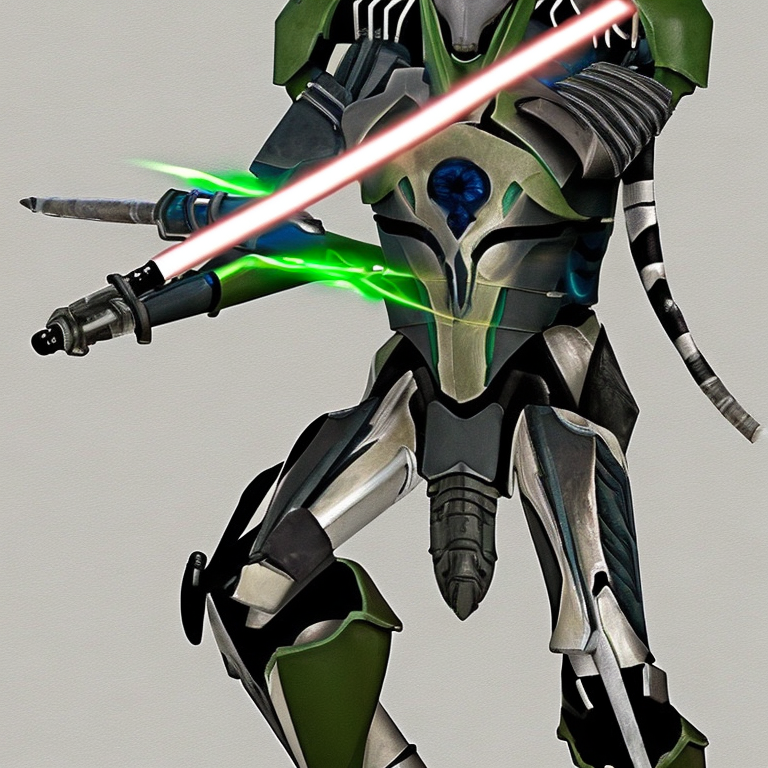

In [5]:
# Image Generation

image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda")

text = " Can you generate an image of phase 2 commander gree fighting general grievous"
image = image_gen(prompt=text).images[0]
image

In [ ]:
# Audio Generation

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device="cuda")

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation", revision="main")
speaker_embeddings = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params={"speaker_embeddings": speaker_embeddings})

sf.write("speech.wav", speech["audio"], speech["sampling_rate"])
Audio("speech.wav")

Device set to use cuda


RuntimeError: Dataset scripts are no longer supported, but found cmu-arctic-xvectors.py